In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 1.0 Load dataset

In [4]:
df = pd.read_csv(r"C:\Users\Hp\Videos\projects\unsupervised-machine-learning-RupiaMorris\data\merged_customer_data.csv")

df.head()

,customer_id,age,gender,annual_income,education,marital_status,city,state,country,postal_code,...,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score,transaction_id,transaction_date,transaction_amount,item_category,item_count
0,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T001210,2024-04-12,24.24,Beauty,3
1,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T001298,2024-01-09,25.94,Electronics,3
2,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003029,2025-02-02,14.06,Food,1
3,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003128,2024-03-07,31.99,Clothing,2
4,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003660,2024-11-08,45.37,Beauty,1


## 2.0 Handle Missing Values

In [5]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
annual_income               0
education                   0
marital_status              0
city                        0
state                       0
country                     0
postal_code                 0
signup_date                 0
purchase_frequency          0
avg_purchase_value          0
total_spent                 0
days_since_last_purchase    0
favorite_payment_method     0
electronics_score           0
clothing_score              0
home_decor_score            0
beauty_score                0
sports_score                0
books_score                 0
food_score                  0
website_visits_per_month    0
avg_session_duration        0
mobile_app_usage            0
desktop_usage               0
items_viewed_per_visit      0
cart_abandonment_rate       0
email_engagement_rate       0
support_tickets             0
satisfaction_score          0
transaction_id              0
transactio

## 3 Detect and Address Outliers

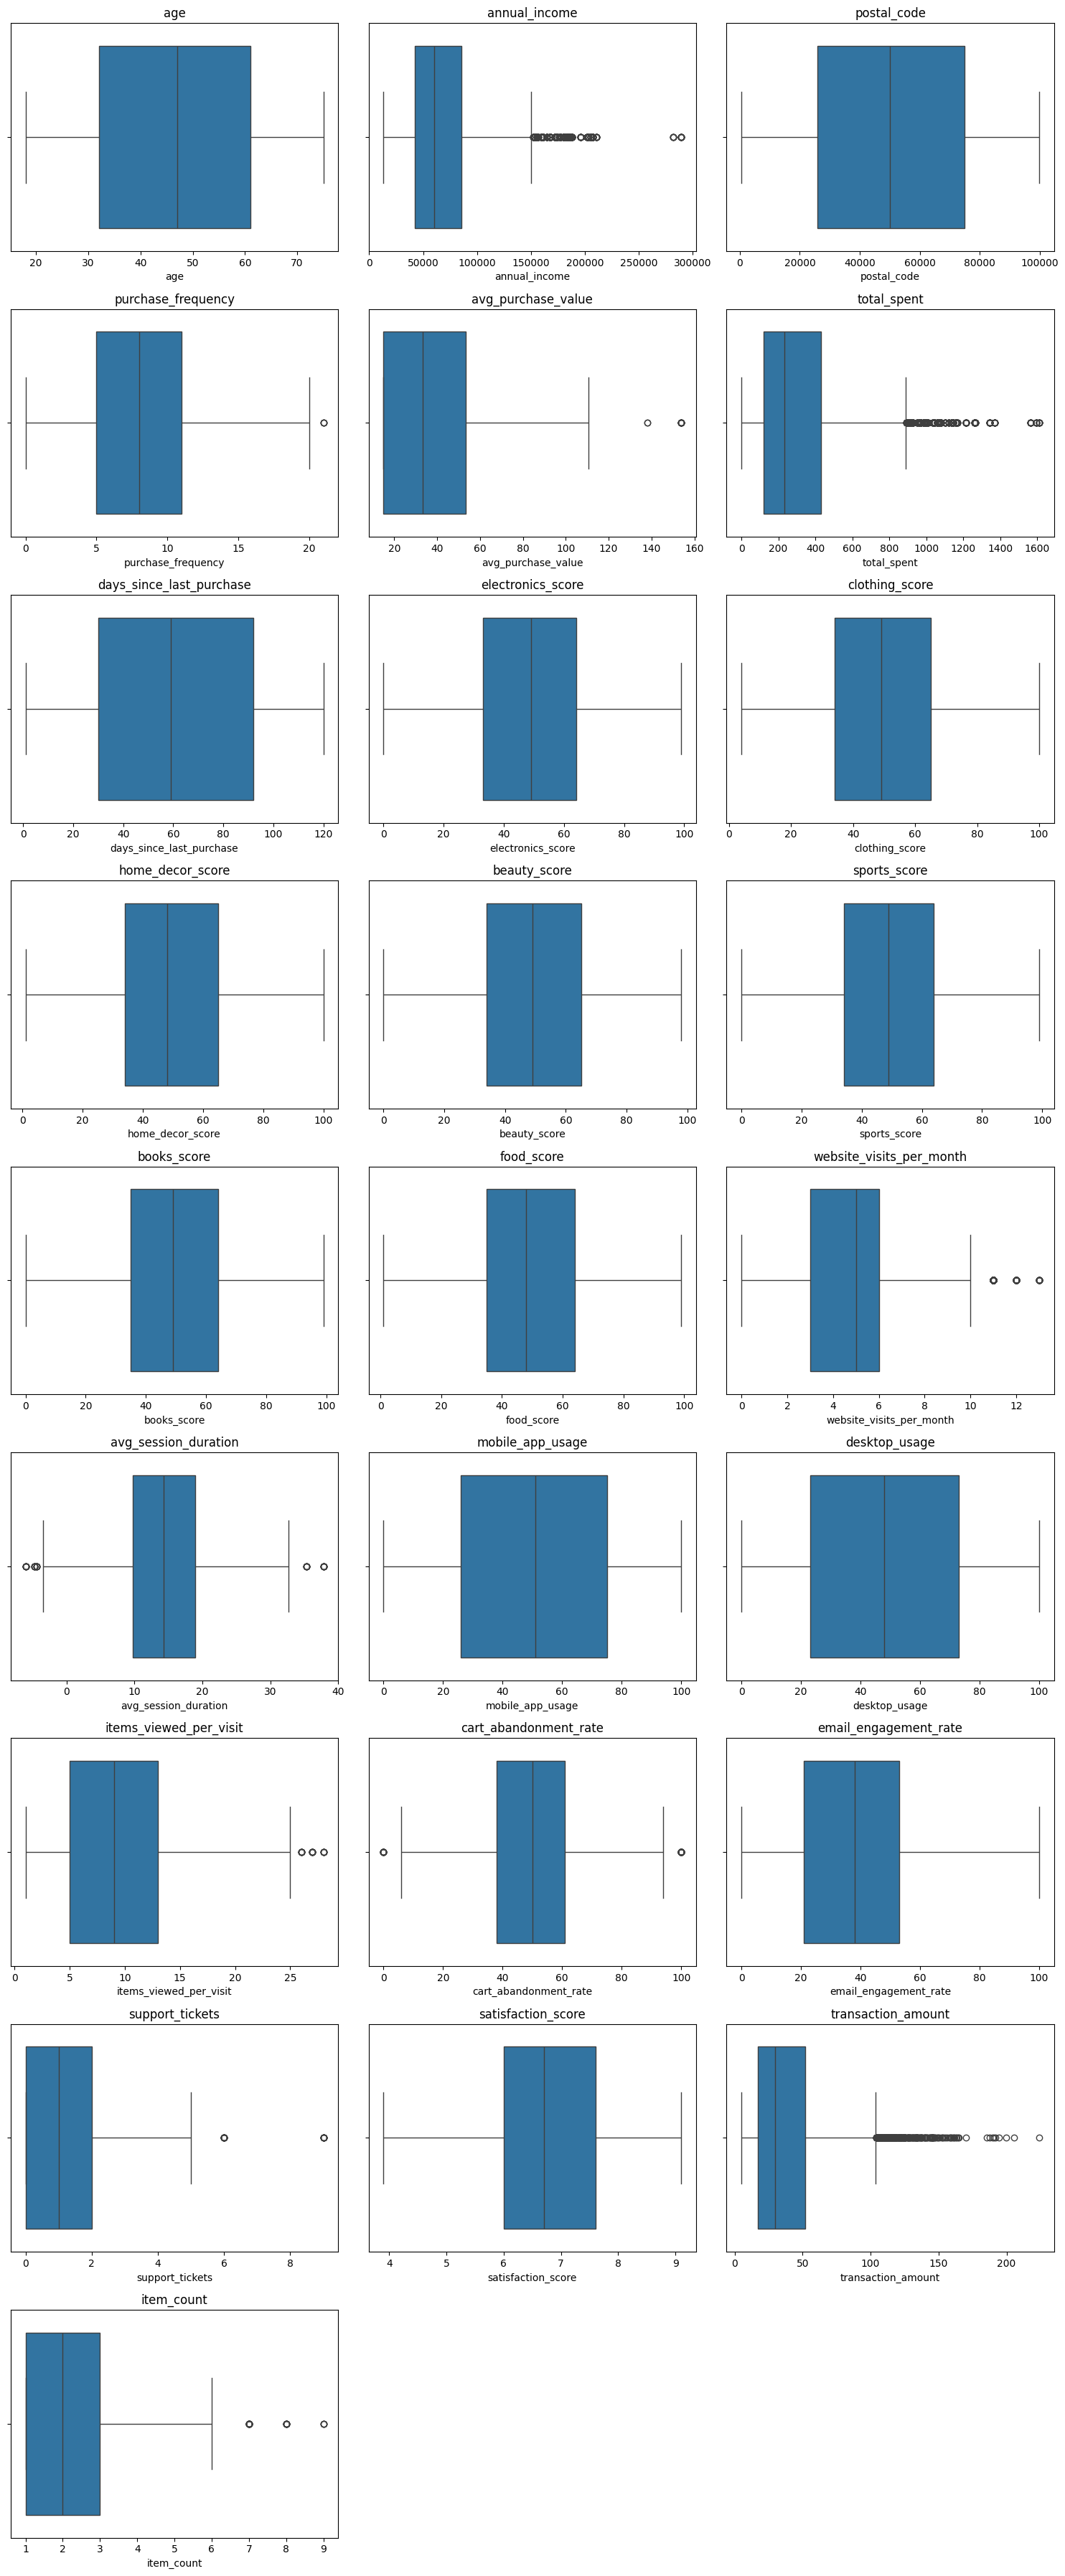

In [8]:
import math

num_plots = len(numerical_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
# Using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## 4.0 Encode Categorical Variables

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['customer_id', 'gender', 'education', 'marital_status', 'city', 'state', 'country', 'signup_date', 'favorite_payment_method', 'transaction_id', 'transaction_date', 'item_category']


In [14]:
# Drop Unnecessary Columns
df = df.drop(columns=['customer_id', 'transaction_id'])

In [15]:
# Extract Features from Dates
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract year, month, or days since signup
df['signup_year'] = df['signup_date'].dt.year
df['signup_month'] = df['signup_date'].dt.month

df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month
df['days_since_signup'] = (df['transaction_date'] - df['signup_date']).dt.days

# Drop original date columns
df = df.drop(columns=['signup_date', 'transaction_date'])

In [16]:
# One-Hot Encode Categorical Features
categorical_to_encode = ['gender', 'education', 'marital_status', 
                         'favorite_payment_method', 'item_category']

df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

In [17]:
# Show encoded shape and sample
print("Encoded shape:", df_encoded.shape)
df_encoded.head()

Encoded shape: (8630, 53)


,age,annual_income,city,state,country,postal_code,purchase_frequency,avg_purchase_value,total_spent,days_since_last_purchase,...,favorite_payment_method_Credit Card,favorite_payment_method_Debit Card,favorite_payment_method_Google Pay,favorite_payment_method_PayPal,item_category_Books,item_category_Clothing,item_category_Electronics,item_category_Food,item_category_Home Decor,item_category_Sports
0,58,76754,Curtisfurt,CT,US,47553,7,30.46,213.2,29,...,False,True,False,False,False,False,False,False,False,False
1,58,76754,Curtisfurt,CT,US,47553,7,30.46,213.2,29,...,False,True,False,False,False,False,True,False,False,False
2,58,76754,Curtisfurt,CT,US,47553,7,30.46,213.2,29,...,False,True,False,False,False,False,False,True,False,False
3,58,76754,Curtisfurt,CT,US,47553,7,30.46,213.2,29,...,False,True,False,False,False,True,False,False,False,False
4,58,76754,Curtisfurt,CT,US,47553,7,30.46,213.2,29,...,False,True,False,False,False,False,False,False,False,False


In [18]:
# Convert boolean columns to integers
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12924\911977100.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [20]:
df_encoded.drop(columns=['city', 'state', 'country', 'postal_code'], inplace=True)

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8630 entries, 0 to 9990
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    8630 non-null   int64  
 1   annual_income                          8630 non-null   int64  
 2   purchase_frequency                     8630 non-null   int64  
 3   avg_purchase_value                     8630 non-null   float64
 4   total_spent                            8630 non-null   float64
 5   days_since_last_purchase               8630 non-null   int64  
 6   electronics_score                      8630 non-null   int64  
 7   clothing_score                         8630 non-null   int64  
 8   home_decor_score                       8630 non-null   int64  
 9   beauty_score                           8630 non-null   int64  
 10  sports_score                           8630 non-null   int64  
 11  books_sco

## 4. Scale/Normalize Numerical Features

In [22]:
# Select only numeric columns (excluding dummy variables)
numerical_features = ['age', 'annual_income', 'purchase_frequency', 'avg_purchase_value', 'total_spent', 'days_since_last_purchase']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler and replace in dataframe
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [30]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 90% of the variance
pca = PCA(n_components=0.90)

# Fit and transform the encoded dataframe
pca_components = pca.fit_transform(df_encoded)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Check resulting shape
print("Original shape:", df_encoded.shape)
print("Reduced shape:", pca_df.shape)

Original shape: (8630, 49)
Reduced shape: (8630, 1)


In [32]:
# Save the reduced data to CSV
pca_df.to_csv(r'C:\Users\Hp\Videos\projects\unsupervised-machine-learning-RupiaMorris\data/reduced_customer_data.csv', index=False)
print("Reduced data saved to data/reduced_customer_data.csv")


Reduced data saved to data/reduced_customer_data.csv
